# Lecture 5: Problems with Equality Constraints

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from func import Func

# Inline plotting
%matplotlib inline

# Make sympy print pretty math expressions
sy.init_printing()

<img src="figures/lecture-05/problem-formulation.png" width="600" />


**Definition**: A point $x^{*}$ satisfying the constraints $h_i(x^{*})=0$ where $i = 1, 2, \cdots, m$ is said to be a **regular point** of the constraints if the gradient vectors $\triangledown h_1(x^{*}), \triangledown h_2(x^{*}), \cdots, \triangledown h_m(x^{*})$ are linearly independent. 

**Definition**: Any point satisfying the equality contraints $h_i(x)=0$ --- $h_i : \mathbb{R}^n \to \mathbb{R}$ --- is called a *feasible point*. The set of all feasible points $S$ describes a surface:
\begin{equation}
S = \{ x \in \mathbb{R}^n \mid h_1(x)=0, h_2(x)=0, \cdots, h_m(x)=0  \}
\end{equation}

**Definition**: The dimension of a vector space $S$ is the minimal number of vectors $\{ x_1, x_2, \cdots, x_n \}$ necessary so that the Span$(x_1, x_2, \cdots\, x_n)=S$

Assuming that the points in $S$ are regular, the dimension of the surface $S$ is $n-m$.

<img src="figures/lecture-05/example-20.3.png" width="600" />


Typically, the gradients of $h_i$ are linearly independent.

<img src="figures/lecture-05/definition-20.3.png" width="600" />


<img src="figures/lecture-05/definition-20.5.png" width="600" />


It is like a plane on top on a plane. T(x) is also known as the kernel of the matrix. A tangent space is local approximation of the surface at the specific point $x^{*}$. The vector $Dh$ is orthogonal to the tangent space.

<img src="figures/lecture-05/definition-20.6.png" width="600" />


<img src="figures/lecture-05/lemma-20.1.png" width="600" />



<img src="figures/lecture-05/figure-20.9.png" width="600" />



<img src="figures/lecture-05/theorem-20.2.png" width="600" />




How to setup equations to find extreme points. Similar to the FONC. When n=2 we are in two dimensions. 

<img src="figures/lecture-05/figure-20.10.png" width="600" />



We can generalise the above:

<img src="figures/lecture-05/theorem-20.3.png" width="600" />




<img src="figures/lecture-05/figure-20.11.png" width="600" />




<img src="figures/lecture-05/example-20.6.png" width="600" />


<img src="figures/lecture-05/example-20.6-continued.png" width="600" />


<img src="figures/lecture-05/example-20.7.png" width="600" />


<img src="figures/lecture-05/figure-20.14.png" width="600" />


We can generalise from the previous example as follows:

<img src="figures/lecture-05/example-20.8.png" width="600" />


<img src="figures/lecture-05/example-20.8-continued.png" width="600" />


To study more about SVM, search "Winston, MIT support vector machine" on Google

---

Minimise $6x^2 + 12y^2$ subject to $x+y=90$.

- Step 1: Take the objective function and subtract from $\lambda$ multiplied by the constraint:

$$
6x^2 + 12y^2 - \lambda(x+y-90)
$$

In [2]:
x, y, lamda = sy.symbols('x, y, lamda')
f = 6*x**2 + 12*y**2 - lamda * (x + y - 90)
F = sy.Matrix([f])
F

⎡                     2       2⎤
⎣-λ⋅(x + y - 90) + 6⋅x  + 12⋅y ⎦

- Step 2: Compute the derivative with respect $x, y$ and $\lambda$:

In [3]:
dF = F.jacobian((x, y, lamda))
dF

[-λ + 12⋅x  -λ + 24⋅y  -x - y + 90]

 - Step 3: Solve it for $x, y$ and $\lambda$ to find the points where the objective function is maximised or minimised:

In [4]:
sy.nonlinsolve(dF, (x, y, lamda))

- Step 4: Evaluate the function at $x=60$ and $y=30$.

In [5]:
f = 6*x**2 + 12*y**2
f.evalf(subs={"x": 60, "y": 30})

 - Step 5: Determine if it is a minimum or a maximum by evaluating another point that satisfies the constraint $x+y=90$:

In [6]:
f.evalf(subs={"x": 59, "y": 31})

---
Find the maximum and the minimum values of the function $x^2 + x + 2y^2 + 3z^2$ subject to $x^2 + y^2 + z^2 = 1$.

In [7]:
x, y, z, lamda = sy.symbols('x, y, z, lamda')
f = x**2 + x + 2*y**2 + 3*z**2 - lamda * (x**2 + y**2 + z**2 - 1)
F = sy.Matrix([f])
F

⎡    ⎛ 2    2    2    ⎞    2          2      2⎤
⎣- λ⋅⎝x  + y  + z  - 1⎠ + x  + x + 2⋅y  + 3⋅z ⎦

In [8]:
dF = F.jacobian((x, y, z, lamda))
dF

⎡                                                 2    2    2    ⎤
⎣-2⋅λ⋅x + 2⋅x + 1  -2⋅λ⋅y + 4⋅y  -2⋅λ⋅z + 6⋅z  - x  - y  - z  + 1⎦

In [9]:
sy.nonlinsolve(dF, (x, y, z, lamda))

---


In [3]:
x, y, z, lamda = sy.symbols('x, y, z, lamda')
f = x-y-z + lamda * ((x**2/4) + (y**2/9) + (z**2/3) - 1)
F = sy.Matrix([f])
dF = F.jacobian((x, y, z, lamda))
sy.nonlinsolve(dF, (x, y, z, lamda))

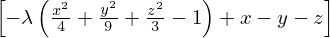

In [2]:
x, y, z, lamda = sy.symbols('x, y, z, lamda')
f = x-y-z + lamda * ((x**2/4) + (y**2/9) + (z**2/3) - 1)
F = sy.Matrix([f])
F

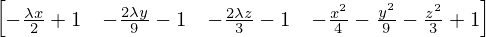

In [3]:
dF = F.jacobian((x, y, z, lamda))
dF

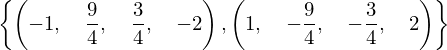

In [4]:
sy.nonlinsolve(dF, (x, y, z, lamda))

We need to evaluate these points on the objective function $f$. Typically, one point would be a minimum and the other point would be a maximum.  